# Predicting Maintance and Replacement Of Milling Machine


This data set gives information on the operation of a milling machine. There are 10,000 observations and consisting of 14 columns. This has the potential of being able to develop a model which is able to take the information surrounding the machine and determine if there is going to be a machine failure and if it is going to be needing replacement. So the problem is to design a model which reliable detects when a machine will fail. 

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  precision_score, recall_score, accuracy_score,roc_auc_score
from sklearn.metrics import plot_confusion_matrix

from google.colab import files

In [ ]:
uploaded = files.upload()

Saving ai4i2020.csv to ai4i2020.csv


In [ ]:
df = pd.read_csv('ai4i2020.csv', sep=',')
print(df.shape)

print(df.columns)
df.head()

(10000, 14)
Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Exploring Data 

First make sure that there is no missing values

In [ ]:
df.isnull().sum(axis=0)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

The Indexes are not important for model design, the type is important and is in the product ID. However, this information has already been extracted and put into type. This means that the UDI and Product ID are not required for any form of analysis.


In [ ]:
df=df.iloc[:,2:]
print(df.shape)
df.head()


(10000, 12)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Now the features present are only those that contribute to machine failure. Now lets look at the porportions for machine failure. Along with the types of machine failure that were present. 

In [ ]:
#
Machine_Failure_Total=df['Machine failure'].sum()
TWF_total=df['TWF'].sum()
HDF_total=df['HDF'].sum()
PWF_total=df['PWF'].sum()
OSF_total=df['OSF'].sum()
RNF_total=df['RNF'].sum()
#
Machine_Failure_prop= Machine_Failure_Total/10000
TWF_prop= TWF_total/10000
HDF_prop=HDF_total/10000
PWF_prop=PWF_total/10000
OSF_prop=OSF_total/10000
RNF_prop=RNF_total/10000

D={'MachineFailure':[Machine_Failure_Total,Machine_Failure_prop],'TWF':[TWF_total,TWF_prop],'HDF':[HDF_total,HDF_prop],'PWF':[PWF_total,PWF_prop],'OSF':[OSF_total,OSF_prop],'RNF':[RNF_total,RNF_prop]}
index_labels=['total','porportion']
df_counts= pd.DataFrame(data=D,index=index_labels)
df_counts

,MachineFailure,TWF,HDF,PWF,OSF,RNF
total,339.0000,46.0000,115.0000,95.0000,98.0000,19.0000
porportion,0.0339,0.0046,0.0115,0.0095,0.0098,0.0019


Roughly 3.39% of the observations had machine failure. Each form of failure consisted of less than one percent of failure except for heat dissipation failure consisted of 1.15% of machine failures.

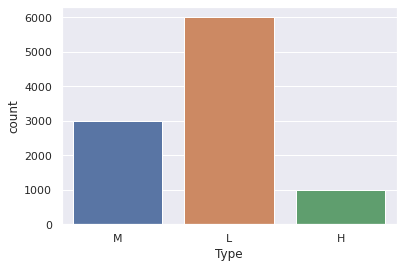

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Type", data=df)

In [ ]:
df['Type'].value_counts(normalize=True)

L    0.6000
M    0.2997
H    0.1003
Name: Type, dtype: float64

The models that are going to be generated are classifications are to whether there is machine failure. Since the types of failures are not independent to machine failure the types of failures are going to be removed from the df. 

In [ ]:
df.head()
df=df.iloc[:,0:7]
print(df.shape)
df.head()

(10000, 7)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


This leaves 6 features to prredict machine failure. Now going to check correlation and distribuitions of the 7 features.

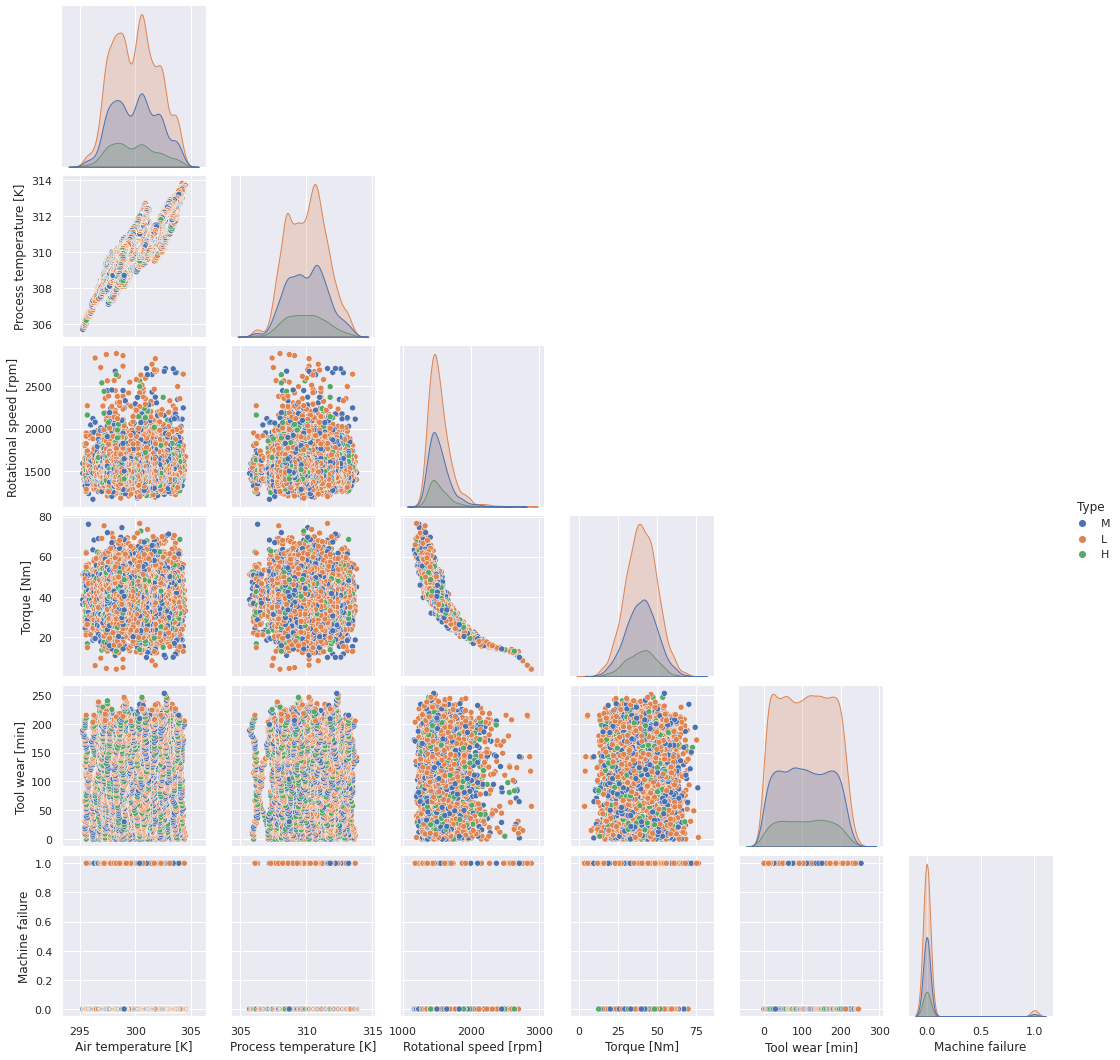

In [ ]:
g=sns.pairplot(df,hue="Type",corner=True)


Process temperature and air tempeture seems to be linearly coorelated. Additionally rotational speed and torque seems to be additionally. To see if these features independent the pearson correlation test will be used. If they are coorelated including them in the model does not provide additional information. Additionally each of the three types had similar distributions. The only difference is that low has a much higher porportion than the others.

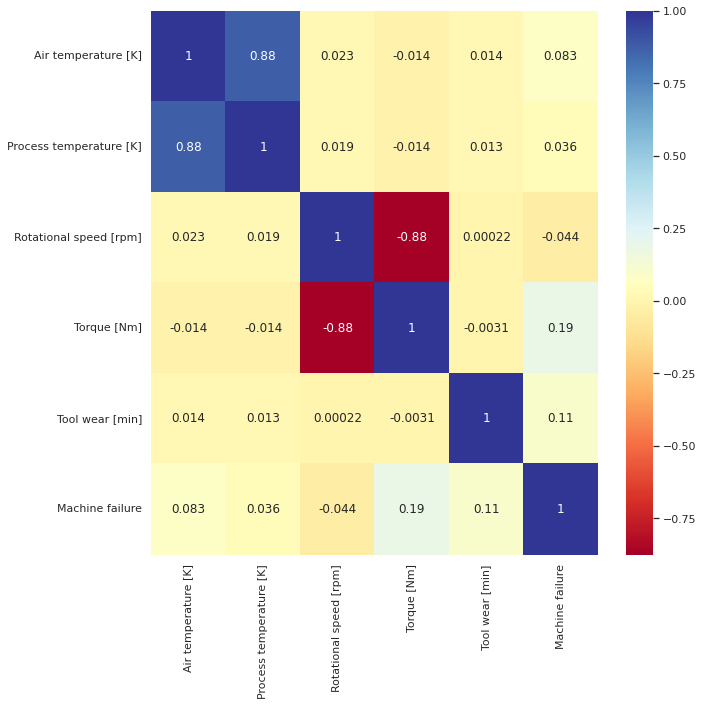

In [ ]:
plt.figure(figsize=(10,10))
df_cluster = df.corr()
sns.heatmap(df_cluster,
            cmap='RdYlBu',
            annot=True,
            ).set_facecolor('white')

This heat map illustrates what the pairplot was showing with the linear coorelation between torque and rotational speed as well as air temperature and process temperature. Using the information about the criterea for the different types of failures transformations are going to be done to generate new features. One feature is that there is a failure when the power drops below 3500 or above 9000. Additionally there is a failure when the difference below temperatures drops below 8.6 and when the prouct of torque and tool wear exceeds 11000. So these criteria will be added and some features will be removed that are used to calculate these features.

In [ ]:
df['Power']=df['Rotational speed [rpm]']*df['Torque [Nm]']
df['HeatDifference']= abs(df['Process temperature [K]']-df['Air temperature [K]'])
df['strain']=df['Tool wear [min]']*df['Torque [Nm]']
df.drop(['Rotational speed [rpm]','Torque [Nm]','Air temperature [K]','Process temperature [K]'],axis=1,inplace=True)


In [ ]:
df.head()


,Type,Tool wear [min],Machine failure,Power,HeatDifference,strain
0,M,0,0,66382.8,10.5,0.0
1,L,3,0,65190.4,10.5,138.9
2,L,5,0,74001.2,10.4,247.0
3,L,7,0,56603.5,10.4,276.5
4,L,9,0,56320.0,10.5,360.0


In [ ]:
df=df.iloc[:,[0,1,3,4,5,2]]
df.head()

,Type,Tool wear [min],Power,HeatDifference,strain,Machine failure
0,M,0,66382.8,10.5,0.0,0
1,L,3,65190.4,10.5,138.9,0
2,L,5,74001.2,10.4,247.0,0
3,L,7,56603.5,10.4,276.5,0
4,L,9,56320.0,10.5,360.0,0


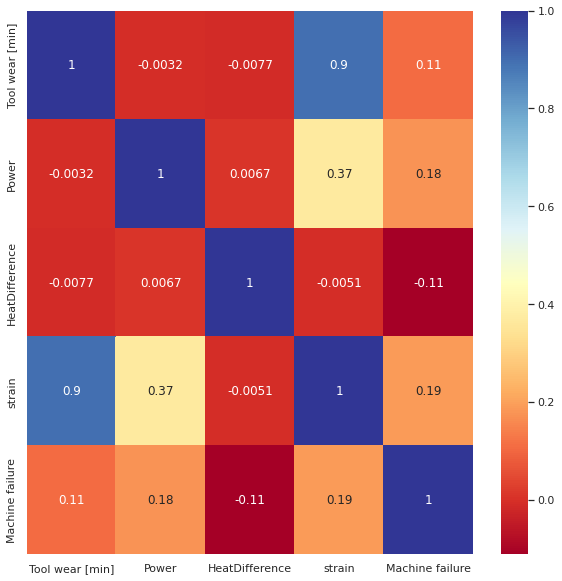

In [ ]:
plt.figure(figsize=(10,10))
df_cluster = df.corr()
sns.heatmap(df_cluster,
            cmap='RdYlBu',
            annot=True,
            ).set_facecolor('white')

The data has been cleaned and the features have been prepared. To check performance for model validation a train set will be made to train the model and a test set to evaluate performance out of sample. This will allow the visualization to see if the model is over/under fit. Do to the large sample size this shouldn't be an issue. 


In [ ]:
#Making Train/Test sets
np.random.seed(1234)

data_randomized = df.sample(frac=1) 
trainsize = round(len(data_randomized) * 0.6)

training_set = data_randomized[:trainsize].reset_index(drop=True)
test_set = data_randomized[trainsize:].reset_index(drop=True)
print(training_set.shape)
print(test_set.shape)

(6000, 6)
(4000, 6)


Check the porportions for each set to see if the predicted categories porportions remain.


In [ ]:
print("Whole Data Set:")
print( df['Machine failure'].value_counts(normalize=True))

print("Training Set:")
print(training_set['Machine failure'].value_counts(normalize=True))
print("Test Set:")
print(test_set['Machine failure'].value_counts(normalize=True))

Whole Data Set:
0    0.9661
1    0.0339
Name: Machine failure, dtype: float64
Training Set:
0    0.965667
1    0.034333
Name: Machine failure, dtype: float64
Test Set:
0    0.96675
1    0.03325
Name: Machine failure, dtype: float64


The train and test subset have machine porportions in the 3.3% which is consistent with the whole set from which they are taken. This shows that the subsets still give a good representation of the population from which they are from. 

# Naive Bayes

In [ ]:
# Install packages needed for Naive Bayes Modeling 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Train Set 

In [ ]:
trainX = training_set.iloc[:,:-1]
trainy = training_set['Machine failure']

colnames = trainX.columns

print(trainX.head())
print("")
print(trainy.head())

  Type  Tool wear [min]    Power  HeatDifference  strain
0    M               98  58444.0             9.2  3724.0
1    L               57  10966.8             9.7   216.6
2    M              109  62409.6             9.4  4316.4
3    M                8  67429.1            10.0   349.6
4    L              177  68132.6            11.2  8726.1

0    0
1    1
2    0
3    0
4    0
Name: Machine failure, dtype: int64


The type needs to be encoded into numerical variables since the model can't be feed strings. This will be done by using the label encoder from sklearn preprocessing.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
trainX['Type']=le.fit_transform(trainX['Type'])
trainX['Type'].value_counts()

1    3600
2    1786
0     614
Name: Type, dtype: int64

The types have now been enumerated into the values 0-2. Where 1=L, 2=M, 3=H. This will allow for this feature to be feed into the naive bayes model. The sklearn naive bayes can take a mix of discrete and continuous variables so the ordinal encoder will be used to turn the continuous variables into bins of discrete for the model. 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()  
trainX = enc.fit_transform(trainX) 
trainX = pd.DataFrame(trainX, columns=colnames) 
trainX.head()  

,Type,Tool wear [min],Power,HeatDifference,strain
0,2.0,97.0,2526.0,29.0,2459.0
1,1.0,56.0,0.0,38.0,122.0
2,2.0,108.0,3368.0,34.0,2846.0
3,2.0,7.0,4336.0,44.0,196.0
4,1.0,176.0,4446.0,65.0,4949.0


Now we are ready to train the naive bayes model

In [ ]:
model = CategoricalNB()  
model.fit(trainX,trainy)

CategoricalNB()

Now to check how the model perfomrs in sample

In [ ]:
yhattrain = model.predict(trainX)
pd.crosstab(yhattrain, trainy)

Machine failure,0,1
row_0,,
0,5786,72
1,8,134


In [ ]:
accuracy_score(yhattrain,trainy )

0.9866666666666667

This model performed exceptionally well on the training data which it was fitted to. It had a false positive 8 times while correctly identifying failure 134/206 times while only missing 72 failures. Now lets check to see if it performs well out of sample.

# Testing Naive Bayes model Out Of Sample


In [ ]:
# Splitting Test set to features and output
testX = test_set.iloc[:,:-1]
testy = test_set['Machine failure']


# enumerating categories for test set
testX['Type']=le.fit_transform(testX['Type'])
testX['Type'].value_counts()


1    2400
2    1211
0     389
Name: Type, dtype: int64

In [ ]:
testX = enc.fit_transform(testX) 
testX = pd.DataFrame(testX, columns=colnames) 
print(testX.head())
print("testy")
print(testy.head())

   Type  Tool wear [min]   Power  HeatDifference  strain
0   1.0            138.0  1274.0            19.0  2188.0
1   1.0              6.0  3455.0            50.0   157.0
2   0.0             89.0  1987.0            32.0  1730.0
3   1.0            170.0  1017.0            44.0  2361.0
4   2.0             40.0   791.0            45.0   615.0
testy
0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64


In [ ]:
yhattest = model.predict(testX)
pd.crosstab(yhattest, testy)


Machine failure,0,1
row_0,,
0,3860,129
1,7,4


In [ ]:
accuracy_score(yhattest, testy)

0.966

While the accuracy of the model is approximately equal to what would be expected if you assumed no machines failed. It did accurately identify 4 failures but miscategorized more as failures than it did correctly identify failures which is a problem. 

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Reset trainX/trainy and testX/testy for building Random forest model
trainX = training_set.iloc[:,:-1]
trainy = training_set['Machine failure']
testX = test_set.iloc[:,:-1]
testy = test_set['Machine failure']

#Enumerate Categorical Variable
trainX['Type']=le.fit_transform(trainX['Type'])
testX['Type']=le.fit_transform(testX['Type'])

In [ ]:
# Fit model to training Data
model = DecisionTreeClassifier().fit(trainX,trainy)

In [ ]:
yhattrain = model.predict(trainX)
pd.crosstab(yhattrain, trainy)

Machine failure,0,1
row_0,,
0,5794,0
1,0,206


In [ ]:
accuracy_score(yhattrain,trainy )


1.0

The decision tree correctly catogorizes all of the data within sample. This is expected do to the bias since the model was made to fit the data so it is important to see how it performs out of sample.

In [ ]:
yhattest = model.predict(testX)
pd.crosstab(yhattest, testy)

Machine failure,0,1
row_0,,
0,3818,57
1,49,76


In [ ]:
accuracy_score(yhattest, testy)

0.9735

This decision tree classification performed better than naive bayes and than just assuming no machines had failed. However, it did have 49 false positives which is quite high and could be a problem if this model was used to determine machines effectiveness. However, it did accurately identify more failures correctly than Naive Bayes model. Also, it correctly guessed more than it false negative predictions showing promise for tree based models. 

# Random Forest Classifier


In [ ]:
# Import RandomForest Classifier 
from sklearn.ensemble import RandomForestClassifier

# Reset trainX/trainy and testX/testy for building Random forest model
trainX = training_set.iloc[:,:-1]
trainy = training_set['Machine failure']
testX = test_set.iloc[:,:-1]
testy = test_set['Machine failure']


In [ ]:
# Need to enumerate categories once again
trainX['Type']=le.fit_transform(trainX['Type'])
testX['Type']=le.fit_transform(testX['Type'])


In [ ]:
#Training Model
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0)
model.fit(trainX,trainy)



RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
yhattrain = model.predict(trainX)
pd.crosstab(yhattrain, trainy)

Machine failure,0,1
row_0,,
0,5794,0
1,0,206


In [ ]:
accuracy_score(yhattrain,trainy )

1.0

Since the random forest is done to fit the training data it proper classifies all the machines. 

# Testing Out of sample

In [ ]:
yhattest = model.predict(testX)
pd.crosstab(yhattest, testy)

Machine failure,0,1
row_0,,
0,3858,62
1,9,71


In [ ]:
accuracy_score(yhattest, testy)

0.98225

This model has a high accuracy at .982 and does an excellent job classifying whether or not there has been machine failure. While this model did correctly identify 5 less it significantly reduced false positive from 49 with the decision tree down to 9 while overall improving accuracy by almost .01. 

# Conclusion


###Naive Bayes Model:
The Naive Bayes model performed poorly in that it had more false positives than true positives. It only identified 4/133 machine failures correctly, this gives it a low sensitivity at .03. So the model performs almost identically to assuming no machines had failed from an accuracy stand point. 

###Decision Tree Model:
The decision tree performed better than the Naive Bayes model going from an accuracy of .966 to .9735. The model had more false positives than the naive bayes model though but made up for it by increasing the correct classification of machine failure. The decision tree model gor 76/133 brining the sensitivity up to .57 so it can notice machine failure at a much greater rate. But the extra false positives is definitly a problem that comes with it which can be improved upon by using other tree models. 


### Random Forest Model:
The random forest performed best of the three bringing an accuracy of .982 which does significantly better than just assuming none had failed. When compared to the Naive Bayes model it had 2 more false positives while identifying 67 true positives. While compared to the decision tree it lost some sensitivity droping from 76 TP to 71. However, greatly improved specificity going from 49 down to 9 greatly improving the model.


The Random Forest Model did a excellent job of determining whether or not there is machine failure with the features given. The model had an out of sample accuracy of 98.2% which is extremely high. Some hyperparameter tuning could be done to obtain a marginally better accuracy but do to noise and random variation in variables I am pleased and feel the model does the job asked of it. 

# References
https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020

Auffarth, B. (2020). Artificial Intelligence with python cookbook: Proven recipes for applying Ai algorithms and deep learning techniques using tensorflow 2.x and pytorch 1.6. Packt. 